# Decision Tree Study Notes 



![image](https://miro.medium.com/max/1380/1*eucTQhlYKFSFw1r4iSkS_g.png)

[Source : Ekrem Hatipoğlu Medium](https://medium.com/@ekrem.hatipoglu/machine-learning-classification-decision-tree-random-forest-part-12-8c9515d811b9)

## Introduction

Decision Tree Algorithm (DT) is one of the most common algorithms. Also, DT algorithms stands in the basis of the many strong ensemble models such as Random Forest, AdaBoost, Gradient boost etc.).Therefore, it would be good to learn the intuition behind the DT.
   
## Decision Tree Basics

DT is quite like how we make our decisions. We have 2 option, and choose according to our situation. Let's give an example:

    You have your Anatomy exam tomorrow which will be a pain in the ***. However,you learnt that your favorite band Dream Theater will have a concert today in your university campus. You need to decide wheter go or not go to the concert. The two options are crystal clear : 
    1. Stay and study for your exam
    2. No one can finish whole anatomy class in one day; skrew it and go to the concert and get hypnotized with Mr. Pertucci's guitar solos. 
    
    In addition to these 2 options; if you have information you can provide +1 tree to your decision making process. Such as;
    1. How many students passed Anatomy by only studying for 1 day
    2. How many students failed Anatomy by only studying for 1 day.
    
    Want to increase??? Nah!!! You get the point.
    

Back to DT (Decision trees, not Dream Theater). 

There are 2 types of DT;

    1. Decision Tree Classifier: If you want to solve a classification problem
    2. Decision Tree Regressor: If you want to solve a numerical problem (prize of house, height of teenagers etc).
    
### Decision Tree Terminology

Root Node: This is the first node that used to start our decision making process. To get a better understanding, see the image above, 'Salary at least >50k' is the root node of that DT. 

Internal Nodes / Branches: The other nodes that brached out of the Root Node (blue boxes in the image). Important thing is the Internal Nodes always connect to another node. Trees never ends at Internal Nodes.

Leaf Nodes / Leaves : The ending nodes of a DT. These are the nodes that a DT ends and we make a decision. 


    Let's interpret the image above:
    
    1. Does the job pays more than 50k? If no; decision is NO (leaf node). If yes; go to the branch:
    2. Internal Branch 1: Do you need to commute more than 1 hour? If yes; decision is NO (leaf node). If yes, move to the next branch:
    3. Internal Branch 2: Does the job offer you free coffee? 
    3a. Leaf Nodes (Leaves): If no: decision is NO. If Yes; Decision is YES.
    


## Attribute Selection Methods
In someplace on the internet while I was reading about DT, I saw an example 'Who is it?' game. This is a perfect match for decision trees. What would be your first question if you play this game? Is it a general question or a specific question? 
    
Would you ask; - Is it John Doe? or - Is it a male? 

I would go for first one, and I think you too. As you gain information about the person, you narrow your questions such as 'Is she blonde?' ' Is she an actor?'.

If you want to do this decision making (narrowing down options) in DT, you have several options:

    * Entropy,
    * Information gain,
    * Gini index,
    Gain Ratio,
    * Reduction in Variance
    Chi-Square



    1. Gini Index  
    
$$ Gini = 1 - \sum_{i=1}^n p_i^2 $$
    
    2. Shannon's Entropy 
 
$$ Shannon's Entropy = - \sum_{i=1}^n p_i log_2 p_i $$

    2a. Entropy After Split

$$ E(T,X) = \sum_c P(c)E(c)  $$
    

    3. Information Gain : 
    
    Information gain or IG is a statistical property that measures how well a given attribute separates the training examples according to their target classification. Constructing a decision tree is all about finding an attribute that returns the highest information gain and the smallest entropy. Long story short ; decrease in entropy is IG.


[source](https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html)
    
$$  Information Gain = E(before) - Entropy(j,after) $$ 


    4. Reduction in Variance (for numeric split)
    
$$ Variance = \frac{\sum(X - \overline X)^2}{n} $$



NOTE: According to Hands on Machine Learning with Scikit-Learn, Keras & Tensorflow book; we can choose any of methods above, they tend to give similar results. 



In [5]:
import pandas as pd
# Defining a simple dataset
stroke ={
    'age' : [20, 26, 37, 67, 87, 55, 35, 74, 16, 45, 72, 33, 34, 66 ],
    'age_groups' : ['youth', 'youth', 'middle_age', 'elder', 'elder', 'senior','middle_age', 'elder', 'youth', 'senior', 'elder', 'middle_age','middle_age', 'elder'],
    'hypertension' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'diabetes' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','yes'],
    'cigarette' : ['yes','yes','no','no','no','yes','yes','no','yes','yes','no','no','yes','no'],
    'stroke' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']
}
stroke = pd.DataFrame(stroke)

In [6]:
stroke

,age,age_groups,hypertension,diabetes,cigarette,stroke
0,20,youth,no,no,yes,no
1,26,youth,no,no,yes,no
2,37,middle_age,no,no,no,yes
3,67,elder,no,no,no,yes
4,87,elder,yes,yes,no,yes
5,55,senior,yes,yes,yes,no
6,35,middle_age,yes,yes,yes,yes
7,74,elder,no,no,no,no
8,16,youth,yes,yes,yes,yes
9,45,senior,yes,yes,yes,yes


In [7]:
# Create functions
import numpy as np # for algebra

#for categorical features 
def gini(data, column):
    """ This is a function to calculate gini impurity 
    for categorical features.
    
    For each category in column, squares of probabilities
    summed as probabilities variable. 
    
    To calculate gini index probabilities extracted from 1.
    
    """
    gini_index = 0
    probabilities = 0
    for index, count in enumerate(set(data[column])):
        probabilities += (data[column].value_counts()[index] / len(data))**2
        gini_index = 1 - probabilities
    
    return gini_index
    
        

In [8]:
gini(stroke,'age_groups')

0.7244897959183674

In [9]:
#Create Shannon's entropy function 
def entropy(data, column):
    """ This function calculates Shannon's Entropy.
    """
    shannon = 0
    for index, count in enumerate(set(data[column])):
        shannon -= ((data[column]).value_counts()[index] / len(data)) * np.log((data[column]).value_counts()[index] / len(data))
    return shannon 

In [10]:
entropy(stroke,'hypertension')

0.6931471805599453

In [11]:
shannon_hypertension = - ((7/14)*np.log(7/14)) - (7/14)*np.log(7/14)
shannon_hypertension

0.6931471805599453

In [12]:
# Shannon for Multiple Features
def multi_shannon(data,column):
    """
    """
    multi = 0
    for index, count in enumerate(set(data[column])):
        multi += ((data[column]).value_counts()[index] / len(data)) * (-((data[column]).value_counts()[index] / len(data)) * np.log((data[column]).value_counts()[index] / len(data)))
    return multi

In [13]:
multi_shannon(stroke,'age_groups')

0.3440425453581655

In [14]:
# let's find the lowest entropy for all columns
for col in stroke.drop(['age', 'stroke'],axis=1).columns:
    print(f"Entropy for {col} : {entropy(stroke,str(col))}")

Entropy for age_groups : 1.3337360272028096
Entropy for hypertension : 0.6931471805599453
Entropy for diabetes : 0.6829081047004717
Entropy for cigarette : 0.6931471805599453


## Decision Trees for Regression

DT model also works same for regression problems, but it tries to minimize MSE rather than impurity. So we have a cost function formula here:


$$ Cost function J(k, t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right} $$


where


$$ MSE_{node} = \sum_{i ∈ node} (\hat{y}_{node} - y^{(i)})^2 $$

and 

$$ \hat{y} = \frac{1}{m_{node}} \sum_{i ∈ node} y^{(i)} $$ 

# Scikit-Learn Decision Tree

So far, I covered fundamentals of DT algorithm such as entropy, gini index, cost function for regression. I coded some of the methods from scratch (entropy and gini index). Now for the practical part, let's move to scikit-learn library. 

Sklearn DT uses Classification and Regression Tree algorithm to train trees (growing trees). What algorithm does ;

    1. Split the data using k feature with a treshhold t (e.g. age < 24)
    2. Uses cost function formula to determine which split to use (minimize cost function) (Cost function nearly the same with regression trees - insted of MSE it uses G - imputity).
    3. Do the same thing again for the next node, recursively.
    4. Stop recursing if reached max_depth parameter (predefined by yourself) or could not decrease impurity


## Regularization Parameters 

If hyperparameters of DT are not set, overfitting is much likely to occur. To prevent overfitting, we need to restrict parameters such tree depth, maximum tree splits, minimum samples in a leaf etc. 
    
    1. max_depth = how far the trees go for dt. ( you can count it starting from root to the last leaf. Default is None 
    2. min_samples_split = minimum samples required to make a split. This can also limit the tree count
    3. min_samples_leaf = minimum samples required in a leaf. So you cannot create one more leaf if you don't have enough samples
    4. max_leaf_nodes = maximum number of leaf nodes.

Let's visualize the DT for the data I created.

In [22]:
# first import modules
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# we need to preprocess the data
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
for col in stroke.select_dtypes(include = 'object'):
    stroke[col] = le.fit_transform(stroke[col])
    
# describe X and y
X = stroke.drop('stroke', axis=1)
y = stroke['stroke']

In [20]:
dt = DecisionTreeClassifier()
clf_fit = dt.fit(X,y)

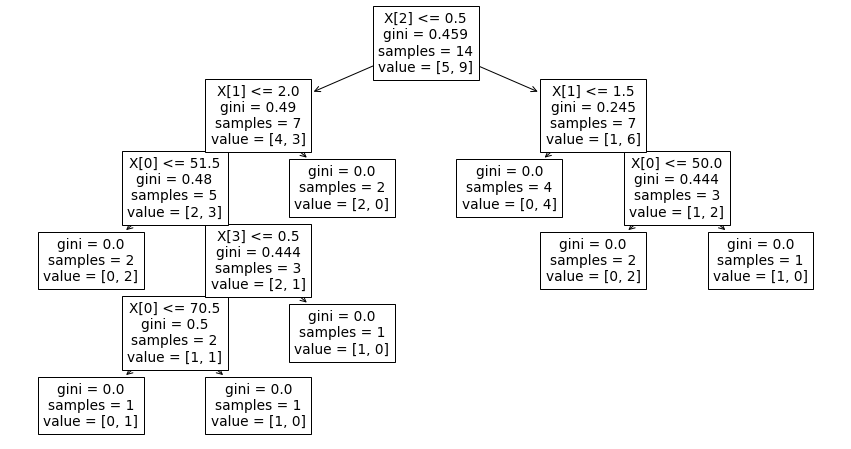

In [24]:
plt.figure(figsize=(15,8))
_ = plot_tree(clf_fit)

References:

1. https://towardsdatascience.com/from-a-single-decision-tree-to-a-random-forest-b9523be65147

2. https://mlcourse.ai/articles/topic3-dt-knn/

3. https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

4. https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8